In [1]:
from datetime import datetime
# importing moules
import os
import pandas as pd
import matplotlib
import numpy as np
from re import search
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import math
from seaborn import histplot

scz_patients_comorbidities = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_scz_patients.csv')
scz_patients_comorbidities["PrimaryMrn"]=scz_patients_comorbidities["PrimaryMrn"].values.astype(str)
scz_patients_demographics = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_ONLYscz_patients.csv')
scz_patients_demographics["PrimaryMrn"]=scz_patients_demographics["PrimaryMrn"].values.astype(str)

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_15241/1424214608.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  scz_patients_comorbidities = pd.read_csv('/Users/valena17/psych_nlp/data/clean_ccsr_scz_patients.csv')


In [2]:
print(scz_patients_comorbidities.PrimaryMrn.nunique())
df_comorbidity = scz_patients_comorbidities[scz_patients_comorbidities['CCSR_wSubstance'].isin(['Schizophrenia spectrum and other psychotic disorders',
                                    'Substance-related disorders',
                                    'Depressive disorders',
                                    'Bipolar and related disorders',
                                    'Trauma- and stressor-related disorders',
                                    'Anxiety and fear-related disorders'])]
print(df_comorbidity.PrimaryMrn.nunique())

19874
19874


In [3]:
df_comorbidity['VisitDate'] = pd.to_datetime(df_comorbidity['VisitDate'])

def before_diagnoses(group):
    # date = group[group['CCSR_code'] == 'Schizophrenia spectrum and other psychotic disorders']['VisitDate']
    date_data = group[group['CCSR_code'] == 'Schizophrenia spectrum and other psychotic disorders']
    date = date_data['VisitDate'].loc[date_data.index[0]]
    before_data = group[group['VisitDate'] <= date]
    return before_data

before_scz_df_comorbidity = df_comorbidity.groupby('PrimaryMrn').apply(lambda group: before_diagnoses(group))
before_scz_df_comorbidity

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_15241/1667435267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comorbidity['VisitDate'] = pd.to_datetime(df_comorbidity['VisitDate'])


PrimaryMrn  EncounterKey           VisitDate  AgeAtVisit  \
PrimaryMrn                                                                  
1003157    0        1003157      10026992 2009-02-02 00:00:00        49.0   
           2        1003157      12589140 2011-11-30 00:00:00        52.0   
           3        1003157     251130954 2012-02-22 00:00:00        52.0   
1003377    5        1003377     136471680 2019-07-26 00:00:00        54.0   
           6        1003377     169200840 2019-10-18 00:00:00        54.0   
...                     ...           ...                 ...         ...   
K156926    47858    K156926     310672084 2022-10-18 00:00:00        29.0   
K161108    47859    K161108     313677350 2022-11-29 00:00:00        46.0   
V724454    47860    V724454     143056795 2020-01-30 17:01:00        63.0   
X300004    47863    X300004      76843447 2018-03-10 02:45:00        58.0   
           47864    X300004     254531792 2018-06-13 00:00:00        58.0   

                                VisitType  VisitType2   Value  \
PrimaryMrn                                                      
1003157    0                 Office Visit  Outpatient   F32.A   
           2      Psych Conf Office Visit   Recurring  F19.10   
           3                 Office Visit  Outpatient   F25.9   
1003377    5                 Office Visit  Outpatient  F31.32   
           6                 Office Visit  Outpatient   F33.9   
...                                   ...         ...     ...   
K156926    47858             Office Visit   Recurring   F25.0   
K161108    47859             Office Visit   Recurring     F29   
V724454    47860       Hospital Encounter   Emergency   F25.9   
X300004    47863       Hospital Encounter   Inpatient   F32.A   
           47864             Office Visit  Outpatient   F25.1   

                                                      DisplayString  \
PrimaryMrn                                                            
1003157    0                                Depression, unspecified   
           2      Other psychoactive substance abuse, uncomplicated   
           3                  Schizoaffective disorder, unspecified   
1003377    5      Bipolar disorder, current episode depressed, m...   
           6      Major depressive disorder, recurrent, unspecified   
...                                                             ...   
K156926    47858             Schizoaffective disorder, bipolar type   
K161108    47859  Unspecified psychosis not due to a substance o...   
V724454    47860              Schizoaffective disorder, unspecified   
X300004    47863                            Depression, unspecified   
           47864          Schizoaffective disorder, depressive type   

                    PayorFinancialClass ProviderSex  ... scz_condition  \
PrimaryMrn                                           ...                 
1003157    0                   Self-Pay        Male  ...             0   
           2                   Self-Pay      Female  ...             0   
           3                        NaN         NaN  ...             1   
1003377    5                        NaN         NaN  ...             0   
           6                        NaN         NaN  ...             0   
...                                 ...         ...  ...           ...   
K156926    47858  Medicaid Managed Care      Female  ...             1   
K161108    47859               Self-Pay      Female  ...             1   
V724454    47860  Medicaid Managed Care      Female  ...             1   
X300004    47863  Medicaid Managed Care      Female  ...             0   
           47864                    NaN         NaN  ...             1   

                 AgeInYears   BirthDate PreferredLanguage SexualOrientation  \
PrimaryMrn                                                                    
1003157    0             63  1959-02-26           English          Straight   
           2             63  1959-02-26      

In [4]:
before_co_mat = pd.crosstab(before_scz_df_comorbidity.PrimaryMrn, before_scz_df_comorbidity.CCSR_wSubstance)
before_df = scz_patients_demographics.merge(before_co_mat, on=['PrimaryMrn'], how='left')
before_df['Substance-related disorders'] = before_df['Substance-related disorders'].clip(0, 1)
before_df_blackwhite = before_df[before_df['Race_2'].isin(['Black or African-American', 'White'])]
before_df_blackwhite_malefemale = before_df_blackwhite[before_df_blackwhite['Merged_Gender'].isin(['Female', 'Male'])]
before_df_blackwhite_malefemale = before_df_blackwhite_malefemale[before_df_blackwhite_malefemale['AgeAtVisit'] > 13]
before_df_blackwhite_malefemale = before_df_blackwhite_malefemale[before_df_blackwhite_malefemale['AgeAtVisit'] < 98]

In [6]:
before_df_blackwhite_malefemale
print(before_df_blackwhite_malefemale.PrimaryMrn.nunique())

11931


In [ ]:
scz_patients_notes_allEs_beforeScz = pd.read_csv("/Users/valena17/psych_nlp/data/scz_patients_notes_allEs_beforeScz.csv")
scz_patients_notes_allEs_beforeScz["PrimaryMrn"] = scz_patients_notes_allEs_beforeScz["PrimaryMrn"].values.astype(str)

178
1    129
2     31
3     11
5      4
4      3
Name: Text, dtype: int64
Mean number of notes w a neg 'homeless' string term per patient = 1.4382022471910112 (sd = 0.8629872723924181)
Median number of notes w a neg 'homeless' string term per patient = 1.0 [5,1])


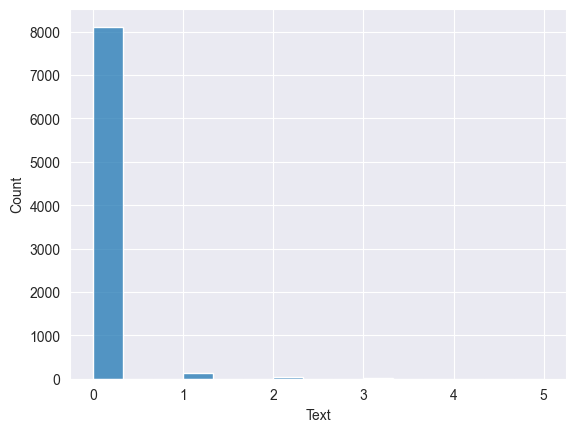

In [67]:
not_homeless_words = ['not homeless',
                      'used to be homeless',
                      'homeless in the past',
                      'was homeless',
                      'no longer homeless',
                      'not housing insecure',
                      'not unhoused']

# not_homeless_mrns = scz_patients_notes_allEs_beforeScz.groupby(['PrimaryMrn'])['Text'].apply(lambda x: x[~x.str.contains('|'.join(not_homeless_words))].count())
# not_homeless_mrns = not_homeless_mrns.to_frame()
# not_homeless_mrns = not_homeless_mrns[not_homeless_mrns.Text != 0]
# not_homeless_mrns = list(not_homeless_mrns.index)
# print(len(not_homeless_mrns))
# homeless_mrns = scz_patients_notes_allEs_beforeScz[~scz_patients_notes_allEs_beforeScz['PrimaryMrn'].isin(not_homeless_mrns)]
# print(homeless_mrns['PrimaryMrn'].nunique())
not_homeless_mrns = scz_patients_notes_allEs_beforeScz.groupby(['PrimaryMrn'])['Text'].apply(lambda x:
                                                                                         x[x.str.contains('|'.join(not_homeless_words))].count())
not_homeless_mrns = not_homeless_mrns.to_frame()
print(np.count_nonzero(not_homeless_mrns))
histplot(not_homeless_mrns['Text'])
not_homeless_mrns = not_homeless_mrns[not_homeless_mrns.Text != 0]
# histplot(homeless_mrns.Text)
print(not_homeless_mrns['Text'].value_counts())
print("Mean number of notes w a neg 'homeless' string term per patient = {0} (sd = {1})".format(
    not_homeless_mrns['Text'].mean(),
    not_homeless_mrns['Text'].std()))
print("Median number of notes w a neg 'homeless' string term per patient = {0} [{1},{2}])".format(
    not_homeless_mrns['Text'].median(),
    not_homeless_mrns['Text'].max(),
    not_homeless_mrns['Text'].min()))

In [70]:
homeless_words = ['homeless', 'homless', 'insecure housing', 'unhoused', 'undomiciled', 'undomiciled', 'sleeping outside',
                  'temporary shelter', "shelter-domiciled", 'sleeping in shelter', 'staying in shelter', 'living in shelter',
                  'living on street', 'living on the street', 'living in homeless shelter', 'lives in shelter',
                  'lives on the street', 'lives in homeless shelter', 'in and out of shelter', 'sleeping on subway',
                  'refuses shelter', 'refuses to go to shelter', 'refuses to stay at shelter', 'refuses to visit shelter',
                  'unwilling to go to shelter', 'sleeping in park', 'sleeping in a park', 'sleeping on a bench', 'sleeping on train',
                  'sleeping on the street', 'sleeps in park', 'sleeps in a park', 'sleeps on a bench', 'sleeps on the street']

# not_homeless_mrns = scz_patients_notes_allEs_beforeScz.groupby(['PrimaryMrn'])['Text'].apply(lambda x: x[~x.str.contains('|'.join(not_homeless_words))].count())
# not_homeless_mrns = not_homeless_mrns.to_frame()
# not_homeless_mrns = not_homeless_mrns[not_homeless_mrns.Text != 0]
# not_homeless_mrns = list(not_homeless_mrns.index)
# print(len(not_homeless_mrns))
# homeless_mrns = scz_patients_notes_allEs_beforeScz[~scz_patients_notes_allEs_beforeScz['PrimaryMrn'].isin(not_homeless_mrns)]
# print(homeless_mrns['PrimaryMrn'].nunique())

homeless_mrns = scz_patients_notes_allEs_beforeScz.groupby(['PrimaryMrn'])['Text'].apply(lambda x:
                                                                                         x[x.str.contains('|'.join(homeless_words))])
homeless_mrns = homeless_mrns.to_frame()

# homeless_mrns = scz_patients_notes_allEs_beforeScz.groupby(['PrimaryMrn'])['Text'].apply(lambda x:
#                                                                                          x[x.str.contains('|'.join(homeless_words))].count())
# homeless_mrns = homeless_mrns.to_frame()
# print(np.count_nonzero(homeless_mrns))
# homeless_mrns = homeless_mrns[homeless_mrns.Text != 0]
# print(histplot(homeless_mrns['Text']))
# # histplot(homeless_mrns.Text)
# print(homeless_mrns['Text'].value_counts())
# print("Mean number of notes w a 'homeless' string term per patient = {0} (sd = {1})".format(
#     homeless_mrns['Text'].mean(),
#     homeless_mrns['Text'].std()))
# print("Median number of notes w a 'homeless' string term per patient = {0} [{1},{2}])".format(
#     homeless_mrns['Text'].median(),
#     homeless_mrns['Text'].max(),
#     homeless_mrns['Text'].min()))

In [96]:
# pd.DataFrame.to_csv(homeless_mrns, "/Users/valena17/psych_nlp/data/homeless_notes.csv",index = True)
homeless_words = ['homeless', 'homless', 'insecure housing', 'unhoused', 'undomiciled', 'undomiciled', 'sleeping outside',
                  'temporary shelter', "shelter-domiciled", 'sleeping in shelter', 'staying in shelter', 'living in shelter',
                  'living on street', 'living on the street', 'living in homeless shelter', 'lives in shelter',
                  'lives on the street', 'lives in homeless shelter', 'in and out of shelter', 'sleeping on subway',
                  'refuses shelter', 'refuses to go to shelter', 'refuses to stay at shelter', 'refuses to visit shelter',
                  'unwilling to go to shelter', 'sleeping in park', 'sleeping in a park', 'sleeping on a bench', 'sleeping on train',
                  'sleeping on the street', 'sleeps in park', 'sleeps in a park', 'sleeps on a bench', 'sleeps on the street']

print(homeless_mrns.Text.str.count('|'.join(homeless_words)).sum(),
      homeless_mrns.Text.str.count("undomicilied|undomiciled").sum(),
      homeless_mrns.Text.str.count("homeless|homless").sum(),
      homeless_mrns.Text.str.count("shelter").sum(),
      homeless_mrns.Text.str.count("unhoused").sum(),
      homeless_mrns.Text.str.count("temporary shelter").sum())

21218 7886 11738 10618 5 19


In [72]:
not_homeless_mrns_list = list(set(not_homeless_mrns.index))
homeless_mrns_2 = scz_patients_notes_allEs_beforeScz[~scz_patients_notes_allEs_beforeScz['PrimaryMrn'].isin(not_homeless_mrns_list)]

homeless_mrns_2 = homeless_mrns_2.groupby(['PrimaryMrn'])['Text'].apply(lambda x:x[x.str.contains('|'.join(homeless_words))].count())
homeless_mrns_2 = homeless_mrns_2.to_frame()
print(np.count_nonzero(homeless_mrns_2))
homeless_mrns_2 = homeless_mrns_2[homeless_mrns_2.Text != 0]
print(histplot(homeless_mrns_2['Text']))
# histplot(homeless_mrns.Text)
print(homeless_mrns_2['Text'].value_counts())
print("Mean number of notes w a 'homeless' string term per patient = {0} (sd = {1})".format(
    homeless_mrns_2['Text'].mean(),
    homeless_mrns_2['Text'].std()))
print("Median number of notes w a 'homeless' string term per patient = {0} [{1},{2}])".format(
    homeless_mrns_2['Text'].median(),
    homeless_mrns_2['Text'].max(),
    homeless_mrns_2['Text'].min()))

# look at some of these notes and check

KeyboardInterrupt: 

In [69]:
def homeless(x):
    if x.PrimaryMrn in list(set(homeless_mrns_2.index)):
        return 1
    else:
        return 0

df_blackwhite_malefemale['homeless_v2'] = df_blackwhite_malefemale.apply(lambda row: homeless(row), axis=1)
df_blackwhite_malefemale.homeless_v2.value_counts(dropna=False)

0    9826
1    2191
Name: homeless_v2, dtype: int64

In [8]:
blackwhite_malefemale_scz = pd.read_csv('/Users/valena17/psych_nlp/data/blackwhite_malefemale_scz.csv')
blackwhite_malefemale_scz["PrimaryMrn"]=blackwhite_malefemale_scz["PrimaryMrn"].values.astype(str)

In [9]:
df_blackwhite_malefemale = blackwhite_malefemale_scz.merge(scz_patients_demographics, on=['PrimaryMrn'], how='left')

In [10]:
df_blackwhite_malefemale.VisitType2.value_counts(dropna=False)

Outpatient     4503
Emergency      3887
Inpatient      2649
Recurring       591
NaN             469
Urgent Care       6
Name: VisitType2, dtype: int64

In [11]:
df_blackwhite_malefemale['visit_type'] = df_blackwhite_malefemale.VisitType2
df_blackwhite_malefemale['visit_type'] = df_blackwhite_malefemale['visit_type'].replace(['Recurring', 'Urgent Care'],
                                                                                        ['Outpatient', 'Outpatient'])

df_blackwhite_malefemale.visit_type.value_counts(dropna=False)

Outpatient    5100
Emergency     3887
Inpatient     2649
NaN            469
Name: visit_type, dtype: int64

In [12]:
df_blackwhite_malefemale

,PrimaryMrn,Age,Gender,Race,m_income,Scz,Substance,Trauma,Anx,Dep,...,SexualOrientation,Merged_Gender,Race_2,Age_group,insurance_status,PostalCode,2021_Median_Hincome,ZIPINC_QRTL,CCSR_wSubstance,visit_type
0,1003377,55.0,Female,Black or African-American,66923.0,1.0,0.0,0.0,0.0,1.0,...,NaN,Female,Black or African-American,55-64,NaN,11221.0,66923.0,"66,000 - 87,999",Schizophrenia spectrum and other psychotic dis...,Outpatient
1,1003711,41.0,Female,Black or African-American,33945.0,1.0,0.0,0.0,0.0,0.0,...,NaN,Female,Black or African-American,35-44,NaN,10451.0,33945.0,"<52,000",Schizophrenia spectrum and other psychotic dis...,Outpatient
2,1009219,41.0,Female,Black or African-American,33901.0,1.0,0.0,0.0,0.0,1.0,...,NaN,Female,Black or African-American,35-44,NaN,10029.0,33901.0,"<52,000",Schizophrenia spectrum and other psychotic dis...,Outpatient
3,1010078,41.0,Male,Black or African-American,65038.0,1.0,0.0,1.0,0.0,0.0,...,NaN,Male,Black or African-American,35-44,NaN,10026.0,65038.0,"52,000 - 65,999",Schizophrenia spectrum and other psychotic dis...,Outpatient
4,1010656,69.0,Female,Black or African-American,152335.0,1.0,0.0,0.0,0.0,1.0,...,NaN,Female,Black or African-American,65-74,NaN,10065.0,152335.0,"88,000+",Schizophrenia spectrum and other psychotic dis...,Outpatient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12100,F909684,33.0,Male,Black or African-American,77378.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12101,F910710,30.0,Male,Black or African-American,147813.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12102,F911156,33.0,Male,Black or African-American,103440.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12103,F911812,50.0,Male,Black or African-American,61414.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
final = df_blackwhite_malefemale[['PrimaryMrn', 'Age', 'Gender', 'Race', 'm_income', 'visit_type', 'Scz', 'Substance', 'Trauma', 'Anx',
                                  'Dep', 'Bpd']]

In [14]:
final

,PrimaryMrn,Age,Gender,Race,m_income,visit_type,Scz,Substance,Trauma,Anx,Dep,Bpd
0,1003377,55.0,Female,Black or African-American,66923.0,Outpatient,1.0,0.0,0.0,0.0,1.0,1.0
1,1003711,41.0,Female,Black or African-American,33945.0,Outpatient,1.0,0.0,0.0,0.0,0.0,0.0
2,1009219,41.0,Female,Black or African-American,33901.0,Outpatient,1.0,0.0,0.0,0.0,1.0,1.0
3,1010078,41.0,Male,Black or African-American,65038.0,Outpatient,1.0,0.0,1.0,0.0,0.0,0.0
4,1010656,69.0,Female,Black or African-American,152335.0,Outpatient,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12100,F909684,33.0,Male,Black or African-American,77378.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0
12101,F910710,30.0,Male,Black or African-American,147813.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0
12102,F911156,33.0,Male,Black or African-American,103440.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0
12103,F911812,50.0,Male,Black or African-American,61414.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
final = final.rename(columns={'Merged_Gender' : 'Gender',
                                                                                          'Race_2' : 'Race_Ethnicity',
                                                                                          'Anxiety and fear-related disorders' : 'Anx',
                                                                                          'Bipolar and related disorders' : 'Bpd',
                                                                                          'Depressive disorders' : 'Dep',
                                                                                          'Schizophrenia spectrum and other psychotic disorders' : 'Scz',
                                                                                          'Substance-related disorders' : 'Substance',
                                                                                          'Trauma- and stressor-related disorders' : 'Trauma_stress',
                                                                                          '2021_Median_Hincome' : 'm_income'})

In [35]:
final

,PrimaryMrn,AgeAtVisit,Gender,Race_Ethnicity,insurance_status,m_income,homeless,homeless_v2,visit_type,Trauma_stress,Substance,Scz,Dep,Bpd,Anx
1,1003377,55.0,Female,Black or African-American,NaN,66923.0,0,0,Outpatient,0,0,1,1,1,0
2,1003711,41.0,Female,Black or African-American,NaN,33945.0,0,0,Outpatient,0,0,1,0,1,0
7,1009219,41.0,Female,Black or African-American,NaN,33901.0,0,0,Outpatient,0,0,1,1,1,0
8,1010078,41.0,Male,Black or African-American,NaN,65038.0,1,0,Outpatient,1,0,1,0,0,0
10,1010656,69.0,Female,Black or African-American,NaN,152335.0,0,0,Outpatient,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,K132949,24.0,Female,White,NaN,33901.0,0,0,Emergency,0,0,1,0,0,1
19865,K145757,13.0,Female,Black or African-American,Public,49679.0,1,0,Outpatient,0,0,1,1,0,0
19867,K151829,49.0,Male,Black or African-American,NaN,101409.0,1,0,Outpatient,1,0,1,0,0,0
19869,K153194,28.0,Male,Black or African-American,Public,68607.0,1,1,Outpatient,0,0,1,0,0,0


In [38]:
scz_allEs = pd.read_csv('/Users/valena17/DataGripProjects/msdw2/output/scz_patients_notes_allEs.csv')
scz_allEs["PrimaryMrn"] = scz_allEs["PrimaryMrn"].values.astype(str)
final = final[final.PrimaryMrn.isin(list(set(scz_allEs.PrimaryMrn)))]
final

/var/folders/xm/m4dy5bvs1fn7fb9wxjhsg4dc0000gn/T/ipykernel_20025/3815448619.py:1: DtypeWarning: Columns (0,1,2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  scz_allEs = pd.read_csv('/Users/valena17/DataGripProjects/msdw2/output/scz_patients_notes_allEs.csv')


,PrimaryMrn,AgeAtVisit,Gender,Race_Ethnicity,insurance_status,m_income,homeless,homeless_v2,visit_type,Trauma_stress,Substance,Scz,Dep,Bpd,Anx
1,1003377,55.0,Female,Black or African-American,NaN,66923.0,0,0,Outpatient,0,0,1,1,1,0
8,1010078,41.0,Male,Black or African-American,NaN,65038.0,1,0,Outpatient,1,0,1,0,0,0
10,1010656,69.0,Female,Black or African-American,NaN,152335.0,0,0,Outpatient,0,1,1,1,0,1
12,1011624,76.0,Female,White,Self-pay,149789.0,0,0,Outpatient,0,0,1,0,0,0
13,1012191,55.0,Male,Black or African-American,Public,148282.0,1,1,Emergency,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,K132949,24.0,Female,White,NaN,33901.0,0,0,Emergency,0,0,1,0,0,1
19865,K145757,13.0,Female,Black or African-American,Public,49679.0,1,0,Outpatient,0,0,1,1,0,0
19867,K151829,49.0,Male,Black or African-American,NaN,101409.0,1,0,Outpatient,1,0,1,0,0,0
19869,K153194,28.0,Male,Black or African-American,Public,68607.0,1,1,Outpatient,0,0,1,0,0,0


In [15]:
pd.DataFrame.to_csv(final, "/Users/valena17/psych_nlp/data/blackwhite_malefemale_scz.csv",index = False)